# Tutorial: Linear Regression - Tensorflow regression model (#3)


In the previous part, we tried to build a model by trying to explain the level of carbon monoxide pollution based on temperature and pressure. Despite the use of shift, the model proved to be inefficient. We will return to this model later. Meanwhile, we will now perform a linear regression model in Sklearn and Tensorflow.

In [1]:
import pandas as pd
df = pd.read_csv('c:/TF/AirQ_filled2.csv')
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),...,PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DATE,Month,Weekday,Weekday_name,Hours
0,0,0,0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,...,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,3,2,Wednesday,18
1,1,1,1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,...,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,3,2,Wednesday,19
2,2,2,2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,...,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,3,2,Wednesday,20


In [2]:
del df['Unnamed: 0']

## Checking the correlation with the result variable
We will consider carbon monoxide CO pollution as the result variable

In [3]:
CORREL = df.corr().sort_values('CO(GT)')
PCK = CORREL['CO(GT)'].to_frame().sort_values('CO(GT)')
PCK

,CO(GT)
PT08.S3(NOx),-0.715683
Weekday,-0.140231
RH,0.020122
AH,0.025227
T,0.025639
Unnamed: 0.1,0.042099
Unnamed: 0.1.1,0.042099
Month,0.112291
Hours,0.344071
PT08.S4(NO2),0.631854


In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
PCK.plot(kind='barh', color='#6d9eeb')
plt.title('Correlation with the resulting variable: CO ', fontsize=20)
plt.xlabel('Correlation level')
plt.ylabel('Continuous independent variables')

Text(0, 0.5, 'Continuous independent variables')

## Part one: Linear regression in Sklearn

Declares X, y variables into the model. To the set of describing variables does not give data in text and date format.

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Date', 'Time', 'CO(GT)',
       'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'DATE',
       'Month', 'Weekday', 'Weekday_name', 'Hours'],
      dtype='object')

In [6]:
X = df[['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH', 'AH'
        ,'Month','Weekday','Hours']].values
y = df['CO(GT)'].values

I divide the collection into training variables and test variables.


In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

I am building a regression model.

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
import numpy as np

y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred, decimals=2)

Comparison of variables from the model with real variables.

In [10]:
dfKK = pd.DataFrame({'CO(GT) Actual': y_test, 'CO(GT)_Predicted': y_pred})
dfKK.head(5)

,CO(GT) Actual,CO(GT)_Predicted
0,1.3,1.18
1,0.6,0.76
2,0.4,0.45
3,0.5,0.44
4,0.8,1.08


In [11]:
dfKK.to_csv('c:/TF/AAr2.csv')

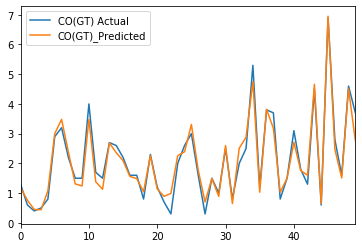

In [12]:
from sklearn import metrics

dfKK.head(50).plot()

In [13]:
print('Mean Squared Error:     ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:      0.9202224478702138


The R Square parameter shows that the model has close to perfection fit into empirical variables.

## How to calculate the R Square parameter?

In the SKlearn package, the R-Square parameter is calculated easily and pleasantly. This is not always the case, for example in the TensorFlow library the calculation of this indicator is difficult. Therefore, we will now calculate the R-Square index on foot.

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.
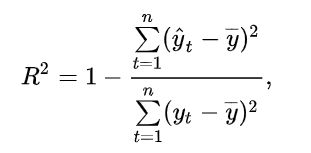

We will now calculate this difficult formula step by step for our example of linear regression.

### <span style="color:darkgreen">Point 1. We calculate the square error
    
The quadratic error is the difference between the actual value and the estimation. We put this difference squared.</span>



In [14]:
dfKK.head(5)

,CO(GT) Actual,CO(GT)_Predicted
0,1.3,1.18
1,0.6,0.76
2,0.4,0.45
3,0.5,0.44
4,0.8,1.08


In [15]:
dfKK['SSE'] = (dfKK['CO(GT) Actual'] - dfKK['CO(GT)_Predicted'])**2
dfKK.head(3)

,CO(GT) Actual,CO(GT)_Predicted,SSE
0,1.3,1.18,0.0144
1,0.6,0.76,0.0256
2,0.4,0.45,0.0025



### <span style="color:darkgreen">Point 2. We calculate the average empirical value of y</span>

In [16]:
dfKK['ave_y'] = dfKK['CO(GT) Actual'].mean()
dfKK.head(3)

,CO(GT) Actual,CO(GT)_Predicted,SSE,ave_y
0,1.3,1.18,0.0144,2.086004
1,0.6,0.76,0.0256,2.086004
2,0.4,0.45,0.0025,2.086004


### <span style="color:darkgreen">Point 3. We calculate the difference between empirical values y and the average of empirical values y</span>

In [17]:
dfKK['SST'] = (dfKK['CO(GT) Actual'] - dfKK['ave_y'])**2
dfKK.head(3)

,CO(GT) Actual,CO(GT)_Predicted,SSE,ave_y,SST
0,1.3,1.18,0.0144,2.086004,0.617803
1,0.6,0.76,0.0256,2.086004,2.208209
2,0.4,0.45,0.0025,2.086004,2.842610


### <span style="color:darkgreen">Point 4. We calculate the difference between sum of SST and sum of SSE</span>

In [18]:
Sum_SST = dfKK['SST'].sum()
print('Sum_SST :',Sum_SST)
Sum_SSE = dfKK['SSE'].sum()
print('Sum_SSE :',Sum_SSE)
SSR = Sum_SST - Sum_SSE

Sum_SST : 3829.9533119658117
Sum_SSE : 305.5443


### <span style="color:darkgreen">Point 5. We calculate the R Square parameter</span>

In [20]:
r2 = SSR/Sum_SST
print('R Square parameter: ',r2)

R Square parameter:  0.9202224478702138
